In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [87]:
# Loading the mnist data
data = tf.keras.datasets.mnist.load_data()

In [88]:
# Creating the training and testing data from the mnist dataset
x_train, y_train = data[0][0] , data[0][1]
x_test, y_test = data[1][0] , data[1][1]

x_train = x_train.reshape(60000,784,1)
x_test = x_test.reshape(10000,784,1)


print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')


x_train : (60000, 784, 1)
y_train : (60000,)
x_test : (10000, 784, 1)
y_test : (10000,)


In [89]:
# Normalizing the train and test datasets
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [90]:
# Building the model
model = tf.keras.models.Sequential()
# Adding the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Building the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Building the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [91]:
# Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [92]:
# Training the model
model.fit(x=x_train, y=y_train, epochs=10) # Start training process
# batch size = 32

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3329 - accuracy: 0.9050
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1389 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0951 - accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [93]:
# Evaluating the model performance
test_loss, test_ac = model.evaluate(x=x_test, y=y_test)
# Printing Model accuracy 
print('Test accuracy:', test_ac)

313/313 [==============================] - 1s 1ms/step - loss: 0.0845 - accuracy: 0.9776
Test accuracy: 0.9775999784469604


In [94]:
predictions = model.predict([x_test]) # Make prediction

313/313 [==============================] - 0s 1ms/step


3


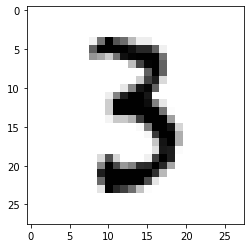

In [95]:
# Testing individual predictions
i=1539
print(np.argmax(predictions[i]))
plt.imshow(x_test[i].reshape(28,28), cmap=matplotlib.cm.binary) # Import the image
plt.show() # Show the image